In [1]:
# Read in Cloudnet data and think about a way to compare it with ICON:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
plt.rc('font', size=12) 
plt.style.use('seaborn-poster')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/01_cloudnet/"

cloudnet_path = "/home/qwertz/obs_data_MA/iqq_cloudnet/"
files = ["20180822_iquique_classification.nc","20180823_iquique_classification.nc",\
         "20180822_iquique_halo-doppler-lidar_BL-classification.nc", "20180823_iquique_halo-doppler-lidar_BL-classification.nc",\
         "20180822_iquique_halo-doppler-lidar_cloud.nc", "20180823_iquique_halo-doppler-lidar_cloud.nc",\
         "20180822_iquique_lwc-adiabatic-method.nc", "20180823_iquique_lwc-adiabatic-method.nc"]

ds_class22 = xr.open_dataset(cloudnet_path+files[0])
ds_class23 = xr.open_dataset(cloudnet_path+files[1])
ds_class = xr.concat([ds_class22, ds_class23], dim="time")
ds_bl22 = xr.open_dataset(cloudnet_path+files[2])
ds_bl23 = xr.open_dataset(cloudnet_path+files[3])
ds_bl = xr.concat([ds_bl22, ds_bl23], dim="time_3min")
ds_lidar22 = xr.open_dataset(cloudnet_path+files[4])
ds_lidar23 = xr.open_dataset(cloudnet_path+files[5])
ds_lidar = xr.concat([ds_lidar22, ds_lidar23], dim="time_3min")
ds_lwp22 = xr.open_dataset(cloudnet_path+files[6])
ds_lwp23 = xr.open_dataset(cloudnet_path+files[7])
ds_lwp = xr.concat([ds_lwp22, ds_lwp23], dim="time")

####################################

print(ds_class.data_vars) # Cloud top, cloud base, target classification.
print("\n\n")
print(ds_bl.data_vars) # aerosols / bl classification?
print("\n\n")
print(ds_lidar.data_vars) # cloud base height
print("\n\n")
print(ds_lwp.data_vars) # lwc und lwp

# print(ds_class["cloud_base_height"])
low_cloudmask_cloudnet = np.squeeze([ds_class["cloud_base_height"].isel(layer=0).values<2000])

print(np.shape(low_cloudmask_cloudnet))

print(ds_lwp["time"].values)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data variables:
    latitude               (time) float32 23kB -20.54 -20.54 ... -20.54 -20.54
    longitude              (time) float32 23kB -70.18 -70.18 ... -70.18 -70.18
    altitude               (time) float32 23kB 56.0 56.0 56.0 ... 56.0 56.0 56.0
    target_classification  (time, height) int8 3MB 8 8 8 8 8 8 8 ... 0 0 0 0 0 0
    detection_status       (time, height) int8 3MB 1 1 1 1 1 1 1 ... 4 4 4 4 4 4
    cloud_base_height      (time, layer) float32 23kB 422.2 422.2 ... 682.2
    cloud_top_height       (time, layer) float32 23kB 862.2 862.2 ... 1.122e+03



Data variables:
    aerosol_layer_mask_3min   (time_3min, height) float32 2MB 0.0 0.0 ... 0.0
    aerosol_layer_top_3min    (time_3min) float32 4kB 22.0 22.0 ... 27.0 27.0
    altitude                  (time_3min) float32 4kB 56.0 56.0 ... 56.0 56.0
    bitfield_3min             (time_3min, height) int16 768kB 16 16 50 ... 16 16
    bl_classification_3min    (time_3min, height) int8 384kB 1 1 1 3 ... 0 0 0 0
    latitude

In [2]:
file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"
ds_icon = xr.open_dataset(file_icon)

###################
# <xarray.DataArray 'qc' (time: 313, height: 200, ncells: 1)>
print(ds_icon.data_vars)
############


'''
for index in range(313):
    dataarray = ds_icon["qc"].isel(ncells=0).isel(time=index)
    for j,data in enumerate(dataarray):
        if dataarray.values[j]>0:
            print(j, ds_icon["z_mc"].isel(ncells=0).values[j])
            break
'''

##########################

def convert_single_timestamp(timestamp):
    day = str(timestamp)[:4]+"-"+str(timestamp)[4:6]+"-"+str(timestamp)[6:8]
    hour_decimal = timestamp % 1
    hour = int(hour_decimal * 24)
    minute_decimal = (hour_decimal * 24 - hour) * 60
    minute = int(minute_decimal)
    second_decimal = (minute_decimal - minute) * 60
    second = int(second_decimal)
    microsecond = int((second_decimal - second) * 1e6)

    time = np.datetime64(str(day)) + np.timedelta64(hour, 'h') + np.timedelta64(minute, 'm') + np.timedelta64(second, 's') + np.timedelta64(microsecond, 'us')

    return time

Data variables:
    clon_bnds      (ncells, vertices) float32 12B ...
    clat_bnds      (ncells, vertices) float32 12B ...
    height_bnds    (height, bnds) float64 3kB ...
    height_3_bnds  (height_3, bnds) float64 3kB ...
    qv             (time, height, ncells) float32 250kB ...
    qc             (time, height, ncells) float32 250kB ...
    qi             (time, height, ncells) float32 250kB ...
    qr             (time, height, ncells) float32 250kB ...
    qs             (time, height, ncells) float32 250kB ...
    qg             (time, height, ncells) float32 250kB ...
    qh             (time, height, ncells) float32 250kB ...
    qnc            (time, height, ncells) float32 250kB ...
    qni            (time, height, ncells) float32 250kB ...
    qnr            (time, height, ncells) float32 250kB ...
    qns            (time, height, ncells) float32 250kB ...
    qng            (time, height, ncells) float32 250kB ...
    qnh            (time, height, ncells) float32 250k

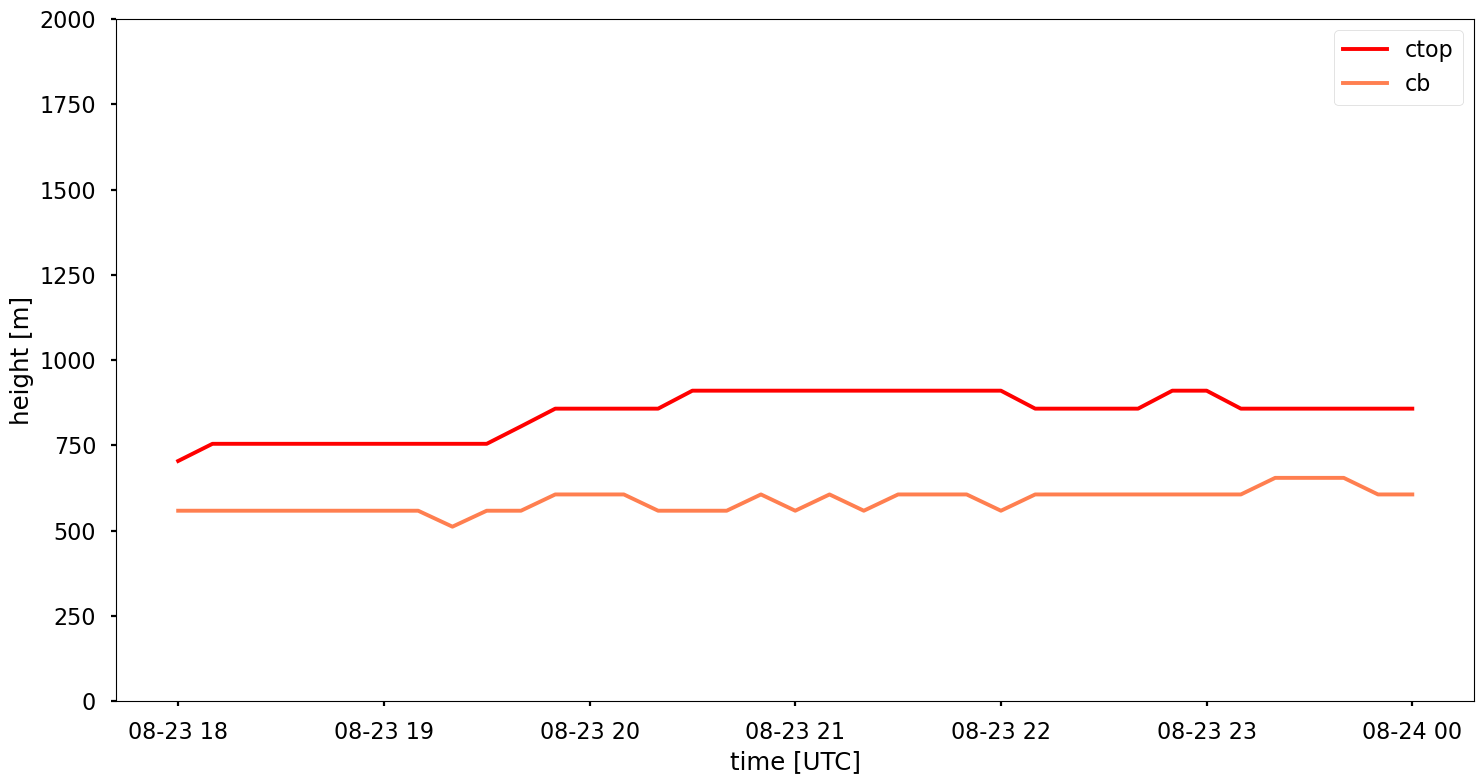

In [3]:
# 1st: detect cloudbase from ICON (see above)

import sys
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import convert_single_timestamp

#####################
# Pick timeslice:
# t_values = [20180822.0, 20180822.25, 20180822.5, 20180822.75, 20180823.0, 20180823.25, 20180823.5, 20180823.75, 20180824]
begin_float=20180823.75
end_float=20180824.0
datetime_begin = str(convert_single_timestamp(begin_float))[:19]
datetime_end = str(convert_single_timestamp(end_float))[:19]
    
ds_cb = ds_icon.isel(ncells=0).sel(time=slice(begin_float,end_float))
ds_class = ds_class.sel(time=slice(datetime_begin,datetime_end))

#####################

heights = ds_icon["z_mc"].isel(ncells=0).values
times = [convert_single_timestamp(date) for date in ds_cb["time"].values]

cloudbases_icon = []
cloudtops_icon = []
for i, timestep in enumerate(times):
    base_found = False
    top_found = False

    #print("\n\n",i, timestep, "\n")
    
    for j, height in enumerate(heights): 
        qc_value = ds_cb["qc"].values[i,j]
        if j > len(heights)-2:
            if not base_found:
                cloudbases_icon.append(np.nan)
                #print("base added1!!")
            if not top_found:
                cloudtops_icon.append(np.nan)
                #print("top added1!!!")
            break
            
        if qc_value>0 and ds_cb["qc"].values[i,j+1]>0 and ds_cb["qc"].values[i,j-1]==0 and ds_cb["qc"].values[i,j-2]==0 and not top_found:
            #print("first case (top): ",height)
            top_found = True
            cloudtops_icon.append(height)
            #print("base added2!!")
            
        elif qc_value==0 and ds_cb["qc"].values[i,j+1]==0 and ds_cb["qc"].values[i,j-1]>0 and ds_cb["qc"].values[i,j-2]>0 and not base_found:
            #print("second case (base): ",height)
            base_found = True
            cloudbases_icon.append(height)
            #print("top added2!!!")

#####################
# print(ds_cb)

plt.figure(figsize=(15,8))
plt.plot(times, cloudtops_icon, label="ctop", color="red")
plt.plot(times, cloudbases_icon, label="cb", color="coral")
plt.xlabel("time [UTC]")
plt.ylabel("height [m]")
plt.ylim(0,2000)
plt.legend()
plt.tight_layout()

################################
# DatPro
# __repr__ - erzeugt einen string, der erklärt, wie ich ein Objekt der Klasse erzeugen kann.
# __str__
#__init__
#__next__
#__iter__
# __enter__
# __exit__
# __add__
# __sub__
# __div__
# 
# content management (enter und exit sollte man kennen.
# List comprehensions werden in c abgewickelt....???


In [4]:
# 3rd: Make timeseries of both compared to cloudnet

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

#####################
#print(ds_class["time"]) # Cloud top, cloud base, target classification.
#print(ds_class)
# cloud_base_height
# cloud_top_height
####################

plt.figure(figsize=(15,8))
plt.scatter(ds_class["time"],ds_class["cloud_base_height"], label="cloud base cloudnet", marker="X", color="blue")
plt.scatter(times, cloudbases_icon, label="cloud base ICON", marker="X", color="red")
plt.xlabel("time [UTC]")
plt.ylabel("height [m]")
plt.legend()
plt.ylim(0,1500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_cloudbases.png")
plt.close()

plt.figure(figsize=(15,8))
plt.scatter(ds_class["time"],ds_class["cloud_top_height"], label="cloud top cloudnet", marker="X", color="blue")
plt.scatter(times, cloudtops_icon, label="cloud top ICON", marker="X", color="red")
plt.xlabel("time [UTC]")
plt.ylabel("height [m]")
plt.legend()
plt.ylim(0,1500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_cloudtops.png")
plt.close()

###################################################################
# Differenz berechnen:

differences_cb = []
differences_cth = []
bias_cb = []
bias_cth = []
for i, (timestep, cb_icon) in enumerate(zip(times, cloudbases_icon)):
    # Finde den zeitlich nächsten Index im Array ds_class["time"]
    nearest_index = np.argmin(np.abs(ds_class["time"].values - timestep))
    # Finde den Wert von ds_class["cloud_base_height"] an diesem Index
    nearest_cb = ds_class["cloud_base_height"].values[nearest_index]  
    differences_cb.append(abs(nearest_cb - cb_icon))
    bias_cb.append(cb_icon - nearest_cb )

    nearest_cth = ds_class["cloud_top_height"].values[nearest_index]
    differences_cth.append(abs(nearest_cth - cloudtops_icon[i]))
    bias_cth.append(cloudtops_icon[i] - nearest_cth )
    
plt.figure(figsize=(15,8))
plt.title("Difference of cloud base height cb between ICON and Cloudnet")
plt.plot(times, differences_cb, label="cloud base difference", color="red")
plt.xlabel("time [UTC]")
plt.ylabel("difference [m]")
plt.legend()
plt.ylim(0,500)
plt.savefig(outputdir+datetime_begin+"_cloudbase_differences.png")
plt.close()

plt.figure(figsize=(15,8))
plt.title("Bias of cloud base height cb: ICON - Cloudnet")
plt.plot(times, bias_cb, label="cloud base bias", color="red")
plt.xlabel("time [UTC]")
plt.ylabel("bias [m]")
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.ylim(-500,500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_cloudbase_bias.png")
plt.close()

plt.figure(figsize=(15,8))
plt.title("Difference of Cloud top height cth between ICON and Cloudnet")
plt.plot(times, differences_cth, label="cloud top difference", color="red")
plt.xlabel("time [UTC]")
plt.ylabel("difference [m]")
plt.legend()
plt.ylim(0,500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_cloudtop_differences.png")
plt.close()

plt.figure(figsize=(15,8))
plt.title("Bias of cloud top height: ICON - Cloudnet")
plt.plot(times, bias_cth, label="cloud top bias", color="red")
plt.xlabel("time [UTC]")
plt.ylabel("bias [m]")
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.ylim(-500,500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_cloudtop_bias.png")
plt.close()

##############################################################
# Wolkendicke berechnen!
h_icon = []
for i in range(len(cloudtops_icon)):
    h_icon.append(cloudtops_icon[i]- cloudbases_icon[i])
h_cloudnet = ds_class["cloud_top_height"]-ds_class["cloud_base_height"]

plt.figure(figsize=(15,8))
plt.title("cloud thickness h for ICON data and Cloudnet")
plt.scatter(times, h_icon, label="cloud thickness ICON", marker="X", color="red")
plt.scatter(ds_class["time"], h_cloudnet, label="cloud thickness Cloudnet", marker="X", color="blue")
plt.xlabel("time [UTC]")
plt.ylabel("h [m]")
plt.ylim(0,1500)
plt.legend()
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_cloud_thickness_h.png")
plt.close()

###############################

# => vielleicht sollten auch bais und difference scatter plots sein....
# Du könntest correlations berechnen
# EIn mittelwert des Bias wäre auf jeden Fall auch interessant
# ebenso der mittlere absolute Fehler.
# => quantifiziere den Unterschied

In [5]:
# 4th make boxplots for cb and ctop:
# und von der Wolkendicke natürlich
# Und difference?

def remove_nans(arr):
    arr = np.array(arr)
    cleaned_arr = arr[~np.isnan(arr)]
    return cleaned_arr

###############################################

plt.figure(figsize=(10,10))
plt.title("cloud thickness h derived by Cloudnet and ICON")
plt.boxplot([remove_nans(h_cloudnet.isel(layer=0).values),remove_nans(h_icon)], labels = ["h Cloudnet", "h ICON"], whis=(0, 100))
plt.ylabel("h [m]")
plt.ylim(0,1500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_boxplot_cloud_thickness.png")
plt.close()


plt.figure(figsize=(10,10))
plt.title("cloud top height cth derived by Cloudnet and ICON")
plt.boxplot([remove_nans(ds_class["cloud_top_height"].isel(layer=0).values),remove_nans(cloudtops_icon)],\
            labels = ["cth Cloudnet", "cth ICON"], whis=(0, 100))
plt.ylabel("cloud top height [m]")
plt.ylim(0,1500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_boxplot_cloudtops.png")
plt.close()


plt.figure(figsize=(10,10))
plt.title("cloud base height cb derived by Cloudnet and ICON")
plt.boxplot([remove_nans(ds_class["cloud_base_height"].isel(layer=0).values),remove_nans(cloudbases_icon)],\
            labels = ["cb Cloudnet", "cb ICON"], whis=(0, 100))
plt.ylabel("cloud base height [m]")
plt.ylim(0,1500)
plt.tight_layout()
plt.savefig(outputdir+datetime_begin+"_boxplot_cloudbases.png")
plt.close()

####################################################################
# Du musst auf jeden Fall diesen Teil in 6 h Intervalle unterteilen, diese automatisiert plotten
#und dabei im titel hinzufügen, um welches Intervall es scih handelt.
# YOu look at cloud bases and tops, but what is about cloud Fraction? When is there a cloud?


In [6]:
# Automatized:

# 1st: detect cloudbase from ICON (see above)

import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from Sc_module import convert_single_timestamp
from Sc_module import convert_to_float_timestamps
# Read in Cloudnet data and think about a way to compare it with ICON:

cloudnet_path = "/home/qwertz/obs_data_MA/iqq_cloudnet/"
files = ["20180822_iquique_classification.nc","20180823_iquique_classification.nc",\
         "20180822_iquique_halo-doppler-lidar_BL-classification.nc", "20180823_iquique_halo-doppler-lidar_BL-classification.nc",\
         "20180822_iquique_halo-doppler-lidar_cloud.nc", "20180823_iquique_halo-doppler-lidar_cloud.nc",\
         "20180822_iquique_lwc-adiabatic-method.nc", "20180823_iquique_lwc-adiabatic-method.nc"]
file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"

ds_icon = xr.open_dataset(file_icon)
ds_class22 = xr.open_dataset(cloudnet_path+files[0])
ds_class23 = xr.open_dataset(cloudnet_path+files[1])
ds_class = xr.concat([ds_class22, ds_class23], dim="time")
ds_bl22 = xr.open_dataset(cloudnet_path+files[2])
ds_bl23 = xr.open_dataset(cloudnet_path+files[3])
ds_bl = xr.concat([ds_bl22, ds_bl23], dim="time_3min")
ds_lidar22 = xr.open_dataset(cloudnet_path+files[4])
ds_lidar23 = xr.open_dataset(cloudnet_path+files[5])
ds_lidar = xr.concat([ds_lidar22, ds_lidar23], dim="time_3min")
ds_lwp22 = xr.open_dataset(cloudnet_path+files[6])
ds_lwp23 = xr.open_dataset(cloudnet_path+files[7])
ds_lwp = xr.concat([ds_lwp22, ds_lwp23], dim="time")

#####################
# Pick timeslice:
# t_values = [20180822.0, 20180822.25, 20180822.5, 20180822.75, 20180823.0, 20180823.25, 20180823.5, 20180823.75, 20180824]

def plot_all_cloudnet_plots(begin_float=20180823.75, end_float=20180824.0, ds_icon=ds_icon, ds_class=ds_class, plot=True):
    datetime_begin = str(convert_single_timestamp(begin_float))[:19]
    datetime_end = str(convert_single_timestamp(end_float))[:19]
        
    ds_cb = ds_icon.isel(ncells=0).sel(time=slice(begin_float,end_float))
    ds_class = ds_class.sel(time=slice(datetime_begin,datetime_end))

    #####################
    low_cloudmask_cloudnet = np.squeeze([ds_class["cloud_base_height"].isel(layer=0).values<1500])
    
    #####################
    
    heights = ds_icon["z_mc"].isel(ncells=0).values
    times = [convert_single_timestamp(date) for date in ds_cb["time"].sel(time=slice(20180822.0,20180824.0)).values]

    low_cloudmask_icon = []
    cloudbases_icon = []
    cloudtops_icon = []
    for i, timestep in enumerate(times):
        base_found = False
        top_found = False
    
        #print("\n\n",i, timestep, "\n")
        
        for j, height in enumerate(heights): 
            qc_value = ds_cb["qc"].values[i,j]
            if j > len(heights)-2:
                if not base_found:
                    cloudbases_icon.append(np.nan)
                    low_cloudmask_icon.append(False)
                else:
                    if cloudbases_icon[i]<1500:
                        low_cloudmask_icon.append(True)
                    else:
                        low_cloudmask_icon.append(False)
                    #print("base added1!!")
                if not top_found:
                    cloudtops_icon.append(np.nan)
                    #print("top added1!!!")
                break
                
            if qc_value>0 and ds_cb["qc"].values[i,j+1]>0 and ds_cb["qc"].values[i,j-1]==0 and \
                    ds_cb["qc"].values[i,j-2]==0 and not top_found:
                #print("first case (top): ",height)
                top_found = True
                cloudtops_icon.append(height)
                #print("base added2!!")
                
            elif qc_value==0 and ds_cb["qc"].values[i,j+1]==0 and ds_cb["qc"].values[i,j-1]>0 and \
                    ds_cb["qc"].values[i,j-2]>0 and not base_found:
                #print("second case (base): ",height)
                base_found = True
                cloudbases_icon.append(height)

    # Exit for FOCs:
    if not plot:            
        return low_cloudmask_icon, low_cloudmask_cloudnet, datetime_begin, datetime_end
    #####################
    # print(ds_cb)
    
    # 3rd: Make timeseries of both compared to cloudnet
    plt.figure(figsize=(15,8))
    plt.title("Cloud base height in ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(ds_class["time"],ds_class["cloud_base_height"], label="cloud base cloudnet", marker="X", color="blue")
    plt.scatter(times, cloudbases_icon, label="cloud base ICON", marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("height [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,1000)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudbases.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    plt.title("Cloud top height in ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(ds_class["time"],ds_class["cloud_top_height"], label="cloud top cloudnet", marker="X", color="blue")
    plt.scatter(times, cloudtops_icon, label="cloud top ICON", marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("height [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,1500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudtops.png")
    plt.close()
    
    ###################################################################
    # Differenz berechnen:
    
    differences_cb = []
    differences_cth = []
    bias_cb = []
    bias_cth = []
    for i, (timestep, cb_icon) in enumerate(zip(times, cloudbases_icon)):
        # Finde den zeitlich nächsten Index im Array ds_class["time"]
        nearest_index = np.argmin(np.abs(ds_class["time"].values - timestep))
        # Finde den Wert von ds_class["cloud_base_height"] an diesem Index
        nearest_cb = ds_class["cloud_base_height"].values[nearest_index]  
        differences_cb.append(abs(nearest_cb - cb_icon))
        bias_cb.append(cb_icon - nearest_cb )
    
        nearest_cth = ds_class["cloud_top_height"].values[nearest_index]
        differences_cth.append(abs(nearest_cth - cloudtops_icon[i]))
        bias_cth.append(cloudtops_icon[i] - nearest_cth )
        
    plt.figure(figsize=(15,8))
    plt.title("Difference of cloud base height cb between ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, differences_cb, label="cloud base difference", marker="X",color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("difference [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudbase_differences.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    mean_bias_cb = np.nanmean(bias_cb)
    plt.title("Bias of cloud base height cb: ICON - Cloudnet (mean: "+str(mean_bias_cb)+")\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, bias_cb, label="cloud base bias", marker="X",color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("bias [m]", fontsize=12) 
    plt.legend()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-500,500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudbase_bias.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    plt.title("Difference of Cloud top height cth between ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, differences_cth, label="cloud top difference",marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("difference [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudtop_differences.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    mean_bias_top = np.nanmean(bias_cth)
    plt.title("Bias of cloud top height: ICON - Cloudnet (mean: "+str(mean_bias_top)+")\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, bias_cth, label="cloud top bias",marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("bias [m]", fontsize=12) 
    plt.legend()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-500,500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudtop_bias.png")
    plt.close()
    
    ##############################################################
    # Wolkendicke berechnen!
    h_icon = []
    for i in range(len(cloudtops_icon)):
        h_icon.append(cloudtops_icon[i]- cloudbases_icon[i])
    h_cloudnet = ds_class["cloud_top_height"]-ds_class["cloud_base_height"]
    
    plt.figure(figsize=(15,8))
    plt.title("cloud thickness h for ICON data and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, h_icon, label="cloud thickness ICON", marker="X", color="red")
    plt.scatter(ds_class["time"], h_cloudnet, label="cloud thickness Cloudnet", marker="X", color="blue")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("h [m]", fontsize=12) 
    plt.ylim(0,1000)
    plt.legend()
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloud_thickness_h.png")
    plt.close()

    #############################################
    # Interpolate icon data on foghat heights:
    interp_func = interp1d(convert_to_float_timestamps(ds_class["time"].values), h_cloudnet.values[:,0])
    # interpolated_cloudnet_hs = interp_func(convert_to_float_timestamps(times[1:]))
    # interpolate error
    #############################################
    
    plt.figure(figsize=(15,8))
    # mean_bias_h = np.nanmean( h_icon[1:]-interpolated_cloudnet_hs)
    # plt.title("Bias for cloud thickness h for ICON - Cloudnet (mean: "+str(mean_bias_h)+")\n timeseries for "+\
    #          datetime_begin+" to "+datetime_end)
    # plt.scatter(times[1:], h_icon[1:]-interpolated_cloudnet_hs, label="cloud thickness ICON", marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("h [m]", fontsize=12) 
    plt.ylim(-500,500)
    plt.legend()
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloud_thickness_bias.png")
    plt.close()
    
    ###############################
    # 4th make boxplots for cb and ctop:
    # und von der Wolkendicke natürlich
    # Und difference?
    
    def remove_nans(arr):
        arr = np.array(arr)
        cleaned_arr = arr[~np.isnan(arr)]
        return cleaned_arr
    
    ###############################################
    # Diese Boxplots habe ic gerade im ylimi of 1500 gesetzt, die Oberkante sieht man in Daten von
    # Cloudnet aber trotzdem nicht immer...
    
    plt.figure(figsize=(10,10))
    plt.title("cloud thickness h derived by Cloudnet and ICON\n boxplot for "+\
              datetime_begin+" to "+datetime_end, fontsize=12) 
    plt.boxplot([remove_nans(h_cloudnet.isel(layer=0).values),remove_nans(h_icon)], labels = ["h Cloudnet", "h ICON"],\
                whis=(0, 100))#, fontsize=12) 
    plt.ylabel("cloud thickness h [m]", fontsize=12) 
    plt.ylim(0,1500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_boxplot_cloud_thickness.png")
    plt.close()
    
    
    plt.figure(figsize=(10,10))
    plt.title("cloud top height cth derived by Cloudnet and ICON\n boxplot for "+\
              datetime_begin+" to "+datetime_end, fontsize=12) 
    plt.boxplot([remove_nans(ds_class["cloud_top_height"].isel(layer=0).values),remove_nans(cloudtops_icon)],\
                labels = ["cth Cloudnet", "cth ICON"], whis=(0, 100))#, fontsize=12) 
    print("mean cloudtop cloudnet: ",np.nanmean(ds_class["cloud_top_height"].isel(layer=0).values))
    print("mean cloudtop ICON: ",np.nanmean(cloudtops_icon))
    plt.ylabel("cloud top height [m]", fontsize=12) 
    plt.ylim(0,1500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_boxplot_cloudtops.png")
    plt.close()
    
    
    plt.figure(figsize=(10,10))
    plt.title("cloud base height cb derived by Cloudnet and ICON\n boxplot for "+\
              datetime_begin+" to "+datetime_end, fontsize=12) 
    plt.boxplot([remove_nans(ds_class["cloud_base_height"].isel(layer=0).values),remove_nans(cloudbases_icon)],\
                labels = ["cb Cloudnet", "cb ICON"], whis=(0, 100))#, fontsize=12) 
    plt.ylabel("cloud base height [m]", fontsize=12) 
    plt.ylim(0,1500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_boxplot_cloudbases.png")
    plt.close()

    ######################################
    # Multipanel in better style:
    
    cloudbase_data = {"Cloudnet":remove_nans(ds_class["cloud_base_height"].isel(layer=0).values),"ICON":remove_nans(cloudbases_icon)}
    cloudtop_data = {"Cloudnet":remove_nans(ds_class["cloud_top_height"].isel(layer=0).values),"ICON":remove_nans(cloudtops_icon)}
    thickness_data = {"Cloudnet":remove_nans(h_cloudnet.isel(layer=0).values),"ICON":remove_nans(h_icon)}

    fig, axs = plt.subplots(1,3, figsize=(15, 8))
    plt.suptitle("Cloud features at Iquique by Cloudnet and ICON LES", fontsize=16)

    sns.boxplot(data=cloudbase_data, palette=["blue", "red"] , ax=axs[0])
    axs[0].set_ylim(200, 900)
    axs[0].set_ylabel('Cloud base height [m]') 
    axs[0].set_title('Cloud base height')

    sns.boxplot(data=cloudtop_data, palette=["blue", "red"] , ax=axs[1])
    axs[1].set_ylim(600, 1300)
    axs[1].set_ylabel('Cloud top height [m]') 
    axs[1].set_title('Cloud top height')
    
    
    sns.boxplot(data=thickness_data, palette=["blue", "red"], ax=axs[2])
    axs[2].set_ylim(0, 900)
    axs[2].set_ylabel("Cloud thickness h [m]")
    axs[2].set_title("Cloud thickness h")

    plt.tight_layout()
    plt.savefig(outputdir+"boxplot_multipanel_"+datetime_begin+" to "+datetime_end+".png")
    plt.close()

    #####################################
    
    return low_cloudmask_icon, low_cloudmask_cloudnet, datetime_begin, datetime_end

###############################################################
t_values = [20180822.0, 20180822.25, 20180822.5, 20180822.75, 20180823.0, 20180823.25, 20180823.5, 20180823.75,\
            20180824, 20180822.0,20180824]

for i, timestep in enumerate(t_values):
    if i+1==len(t_values):
        break
    if t_values[i+1]<timestep:
        print("overleaped timestep: ", timestep, " to ", t_values[i+1])
        continue
    begin_float = timestep
    end_float = t_values[i+1]
    low_cloudmask_icon, low_cloudmask_cloudnet, datetime_begin, datetime_end =\
        plot_all_cloudnet_plots(begin_float=begin_float, end_float=end_float)

    unique_icon, counts_icon = np.unique(low_cloudmask_icon, return_counts=True)
    unique_cloudnet, counts_cloudnet = np.unique(low_cloudmask_cloudnet, return_counts=True)

    # Possibility to print FOCs:
    # print("\n\n",datetime_begin, datetime_end)
    # print("Cloudnet: ",counts_cloudnet[-1]/len(low_cloudmask_cloudnet))
    # print("Icon: ",counts_icon[-1] / len(low_cloudmask_icon))
    
####################################################################
# => vielleicht sollten auch bais und difference scatter plots sein....XXX
# YOu look at cloud bases and tops, but what is about cloud Fraction? When is there a cloud?XXX
# EIn mittelwert des Bias wäre auf jeden Fall auch interessantXXX
# --------------------

# Du könntest correlations berechnen
# ebenso der mittlere absolute Fehler.
# => quantifiziere den Unterschied
# Create 4 panels for all 4x6hours of one day!


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  929.30536
mean cloudtop ICON:  682.9262050083705


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  929.9478
mean cloudtop ICON:  711.8187808990479


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  986.5293
mean cloudtop ICON:  676.2435073852539


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  991.29877
mean cloudtop ICON:  747.427484421503


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  1042.7417
mean cloudtop ICON:  842.7055448644302


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  1312.3079
mean cloudtop ICON:  805.7759146854795


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  1167.2896
mean cloudtop ICON:  762.7017110188802


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  1140.9144
mean cloudtop ICON:  843.83484
overleaped timestep:  20180824  to  20180822.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  1058.7656
mean cloudtop ICON:  765.7189754017612


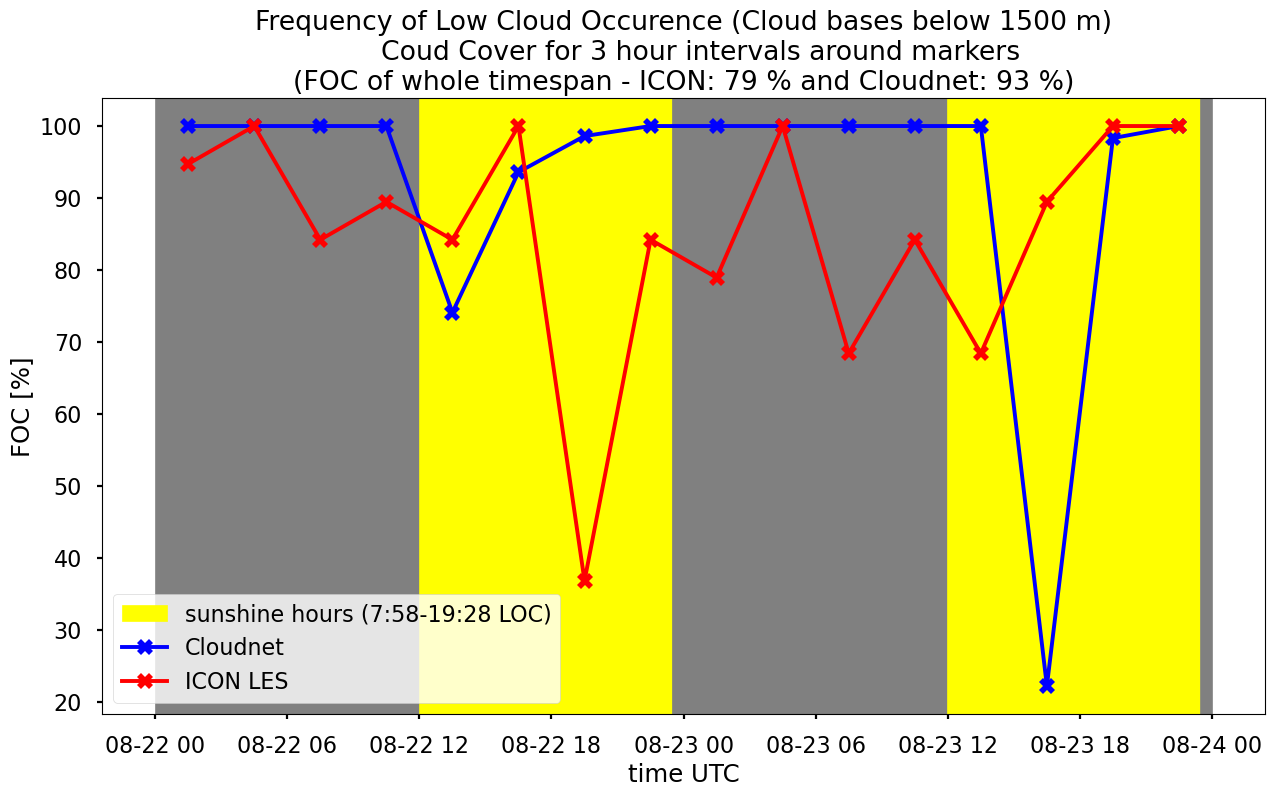

In [7]:
# Write FOCs into a plot:

t_values = [20180822.000, 20180822.125, 20180822.250, 20180822.375, 20180822.500, 20180822.625,\
            20180822.750, 20180822.875, 20180823.000, 20180823.125, 20180823.250, 20180823.375,\
            20180823.500, 20180823.625, 20180823.750, 20180823.875, 20180824.000]

cloudnet_focs = []
icon_focs = []
dates = []
for i, timestep in enumerate(t_values):
    if i+1==len(t_values):
        break
    if t_values[i+1]<timestep:
        print("overleaped timestep: ", timestep, " to ", t_values[i+1])
        continue
    begin_float = timestep
    end_float = t_values[i+1]
    low_cloudmask_icon, low_cloudmask_cloudnet, datetime_begin, datetime_end =\
        plot_all_cloudnet_plots(begin_float=begin_float, end_float=end_float, plot=False)

    unique_icon, counts_icon = np.unique(low_cloudmask_icon, return_counts=True)
    unique_cloudnet, counts_cloudnet = np.unique(low_cloudmask_cloudnet, return_counts=True)
    
    cloudnet_focs.append(counts_cloudnet[-1]/len(low_cloudmask_cloudnet))
    icon_focs.append(counts_icon[-1] / len(low_cloudmask_icon))
    dates.append(np.datetime64(datetime_begin)+(np.datetime64(datetime_end)-np.datetime64(datetime_begin))/2)

#############
# Plot of FOC:
# Cloudbase laut Cloudnet (Lidar) below 1500 m
# ICON: 2 bins with qc > 0 below 1500 m
# Ich sagte vorher es gäbe einen stärkeren Tagesgang in ICON.
# Dieser plot zeigt aber klarer, dass in ICON die Werte eher gleichmäßiger Verlaufen
# und die Messungen einen klaren Tagesgang haben.
# Nighttime clouds are very stable in reality and do not form in ICON with this stability
plt.figure(figsize=(15,8))
plt.title("Frequency of Low Cloud Occurence (Cloud bases below 1500 m)\n\
    Coud Cover for 3 hour intervals around markers\n(FOC of whole timespan - ICON: 79 % and Cloudnet: 93 %)")# , fontsize=12) 
plt.axvspan(np.datetime64("2018-08-22T00:00:00"), np.datetime64("2018-08-23T11:58:00"), color="grey")
plt.axvspan(np.datetime64("2018-08-22T11:58:00"), np.datetime64("2018-08-22T23:28:00"), color="yellow",label="sunshine hours (7:58-19:28 LOC)") # 8:00 -20:00 local
plt.axvspan(np.datetime64("2018-08-22T23:28:00"), np.datetime64("2018-08-23T11:58:00"), color="grey")
plt.axvspan(np.datetime64("2018-08-23T11:58:00"), np.datetime64("2018-08-23T23:28:00"), color="yellow") # 8:00 -20:00 local
plt.axvspan(np.datetime64("2018-08-23T23:28:00"), np.datetime64("2018-08-24T00:00:00"), color="grey")
# 06:56 bis 18:19
plt.plot(dates, np.array(cloudnet_focs)*100, marker = "X", color="blue", label="Cloudnet")
plt.plot(dates, np.array(icon_focs)*100, marker = "X",color="red", label="ICON LES")
plt.xlabel("time UTC")
plt.ylabel("FOC [%]")
plt.legend()
plt.savefig(outputdir+"FOCs_ICON_and_Cloudnet.png")

In [8]:
# check variables like qc, qi, etc.

In [9]:
####################################################################

# Du könntest auch noch ähnliche Plots wie in deiner BA hinzufügen (plus correlation)